 <p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Features Engineering


Dans ce chapitre, nous allons apprendre à créer des indicateurs techniques par nous-mêmes et comment en créer en utilisant la librairie TA. Cela dans le but d'expliquer le processus de Features Engineering. 

### Summary
* Moyenne mobile simple (SMA)
* Volatilité mobile simple (MSD)
* Créer des indicateurs plsu complexes grâce à la librairie TA ("Technical analysis" soit "Analyse Technique" en FR)

</br>

💰Rejoindre la communauté: https://discord.gg/wXjNPAc5BH

📚Lisez notre livre (en anglais uniquement): https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Notre chaine YouTube (en anglais uniquement): https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw





In [ ]:
!pip install yfinance
!pip install ta

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=dc8e26cb51c88334e942cc04da5d73a9972147e223e51f65217d633e23aa64f2
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a98

In [ ]:
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Import the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [ ]:
!pip install pandas==1.4.0

ERROR: Could not find a version that satisfies the requirement pandas==1.4.0 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==1.4.0


In [ ]:
pd.__version__

'1.1.5'

In [ ]:
# Import some data
df = yf.download("GOOG")
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Important**: Les noms des colonnes sont différents entre l'importation à l'aide de Yahoo Finance API et l'importation à l'aide de MetaTrader5. Ainsi, pour éliminer ce problème, nous allons renommer les colonnes nécessaires toujours avec le même nom. Ici, nous n'avons besoin que de la colonne Ajusted Close.

In [ ]:
# Rename the columns
df = df[["Adj Close"]].dropna()
df.columns = ["close"]
df

,close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086
...,...
2021-12-27,2961.280029
2021-12-28,2928.959961
2021-12-29,2930.090088


# Simple Moving Average (SMA)

In [ ]:
# Simple moving average
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1)
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1)
df

,close,SMA 15,SMA 60
Date,,,
2004-08-19,49.982655,NaN,NaN
2004-08-20,53.952770,NaN,NaN
2004-08-23,54.495735,NaN,NaN
2004-08-24,52.239197,NaN,NaN
2004-08-25,52.802086,NaN,NaN
...,...,...,...
2021-12-27,2961.280029,2916.338005,2883.806344
2021-12-28,2928.959961,2923.729346,2888.739176
2021-12-29,2930.090088,2927.264681,2892.067676


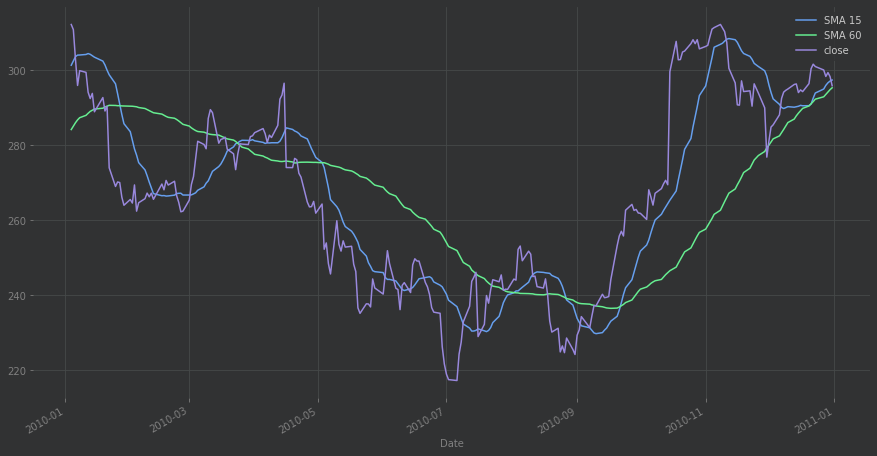

In [ ]:
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Moving Standard Deviation (MSD)

In [ ]:
# Volatility of returns
df["returns"] = df["close"].pct_change(1)
df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)
df

,close,SMA 15,SMA 60,returns,MSD 15,MSD 60
Date,,,,,,
2004-08-19,49.982655,NaN,NaN,NaN,NaN,NaN
2004-08-20,53.952770,NaN,NaN,0.079430,NaN,NaN
2004-08-23,54.495735,NaN,NaN,0.010064,NaN,NaN
2004-08-24,52.239197,NaN,NaN,-0.041408,NaN,NaN
2004-08-25,52.802086,NaN,NaN,0.010775,NaN,NaN
...,...,...,...,...,...,...
2021-12-27,2961.280029,2916.338005,2883.806344,0.006263,0.013761,0.015202
2021-12-28,2928.959961,2923.729346,2888.739176,-0.010914,0.013496,0.015145
2021-12-29,2930.090088,2927.264681,2892.067676,0.000386,0.013803,0.014950


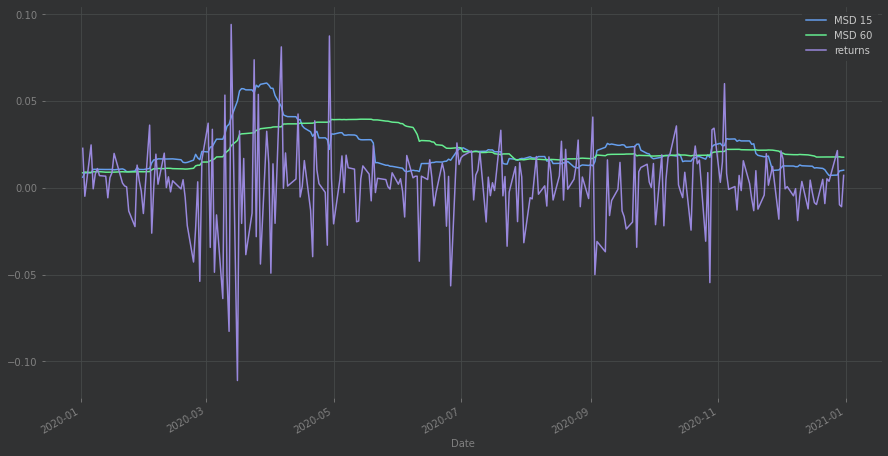

In [ ]:
df[["MSD 15", "MSD 60", "returns"]].loc["2020"].plot(figsize=(15,8))

# Technical Analysis (ta) library
https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

You can check this link (offical ta documentation) if you want use another indicator. (This is not the ta-lib library, don't be mistaken)

In [ ]:
# Import ta library
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14)
RSI

In [ ]:
df["rsi"] = RSI.rsi().shift(1)

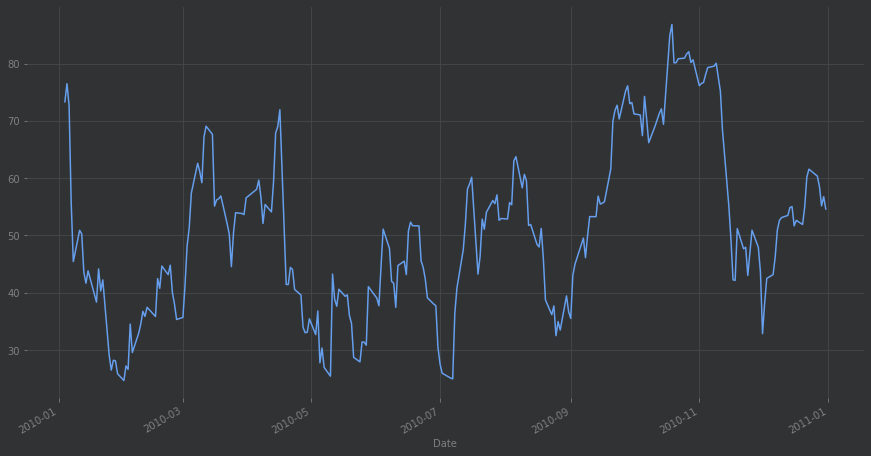

In [ ]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# CREATE A FUNCTION

In [ ]:
def feature_engineering(df):
    """ Create new variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift()
    
    return df_copy

In [ ]:
df = yf.download("GOOG")
df = df[["Adj Close"]]
df.columns = ["close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_engineering(df)

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
Date,,,,,,,
2004-08-19,49.982655,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,53.952770,0.079430,NaN,NaN,NaN,NaN,NaN
2004-08-23,54.495735,0.010064,NaN,NaN,NaN,NaN,NaN
2004-08-24,52.239197,-0.041408,NaN,NaN,NaN,NaN,NaN
2004-08-25,52.802086,0.010775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-08,2987.030029,0.000740,2885.634668,2831.296501,0.019377,0.017879,63.080263
2021-11-09,2984.969971,-0.000690,2894.156006,2834.944999,0.019390,0.017788,62.786726
2021-11-10,2932.520020,-0.017571,2901.391341,2838.389164,0.019565,0.016162,55.682186
